# Homework 1: Named Entity Recognition (NER) with Sequence Labeling Models
## CS4740/5740 Fall 2023

### Project Submission Due: September 20, 2023 (11:59PM)
### Milestone Submission Due: September 13, 2023 (11:59PM)

## Introduction
In this project, you will implement two models, namely Hidden Markov Model (HMM) and Maximum Entropy Markov Model (MEMM), as well as the Viterbi algorithm to identify named entities in text and tags them with the appropriate label. This task is known as **Named Entity Recognition**.

We will treat this as a **sequence-tagging task**: for each token in the input text, assign one of the following 5 entities -- **ORG** (Organization), **PER** (Person), **LOC** (Location), **MISC** (Miscellaneous), and **O** (Not Named Entity)) -- as well as a BIO-format prefix **B-** (token is the *beginning* of a named entity) or **I-** (token is *inside* a named entity). Thus, overall this makes 9 different labels: **B-ORG, I-ORG, B-PER, I-PER, B-LOC, I-LOC, B-MISC, I-MISC** and **O**.

To refresh your memory on HMMs, MEMMs, and Viterbi you can refer to **Jurafsky & Martin Ch. 8.3–8.5** and the lecture slides which can be found on the course website.

<u>Authors:</u> Benjamin Hu, Gavin Fogel, Sienna Hu, Vivian Chen, Vivian Nguyen <br>
<u>Acknowledgments:</u> We drew inspiration and the code from previous efforts by CS 4740/5740 professors and TAs from this and previous semesters, Chenxin Fang, Meghana Srivastava, Khonzoda Umarova, Ruizhe Wang, Han Xia, and Heather Zhang.

## **Logistics**


- You are **strongly encouraged** to work in **groups of 2 students**. Students in the same group will get the same grade. Thus, you should make sure that everyone in your group contributes to the project.
- **Remember to form groups on Gradescope**, or not all group members will receive grades. You can make a post on EdStem to find a partner for this project.
- Please complete the written questions in a separate file that will be submitted as a pdf.
- In this assignment you are asked to make two submissions:
  1. The **final homework submission due on September 20 (11:59 PM)**.
      - For this, please make sure to submit a zip file named `final_submission.zip` containing the following files:
        - `models.py`, `helpers.py`, `data_exploration.py`, `viterbi.py`, `validation.py` (5 python source files)
			- There is a script you can run locally before submitting your python files, `check_submission.py`. This will check the cwd for the required zip specified above, and check its contents to make sure you have all of the required python files with your names and net ids, and all of the required functions and classes. It is simply for your convenience and makes no guarantees on the validity or correctness of your program or assignment.
      - You will submit your answers to the written questions to a separate assignment on Gradescope.
        - `questions.pdf` (containing your answers to all the written questions, if there are graphs please include them in the pdf)
  2. Intermediate **milestone submission due on September 13 (11:59 PM)**.
      - For this, please submit the same files completed up to and including Part 2. Points will be awarded for meeting the milestone deadline but **not** for correctness.
  
  Note: you will **NOT** be submitting this .ipynb file.
  
- Do **NOT** add, remove, or modify any imports across python source files. If you have any concerns regarding missing imports, please let course staff know through EdStem before attempting to change anything.
- Do **NOT** change any of the function headers and/or specs! The input(s) and output must perfectly match the specs, or else your implementation for any function with changed specs will most likely fail!
- If you decide to create local helper functions, your code must have docstrings/comments documenting the meaning of parameters and important parameter-like variables.
- We are recommending python version 3.9+. This is due to compatibility issues with the external dependencies.


## **Tips**



- Pair program the more intensive parts of this assignment! You'll thank yourselves later for the amount of trouble this helps you avoid.

- We recommend you start this assignment early and continue incrementally adding onto it! To give you a better idea of the time commitment required for the secondary part of this assignment (**MEMMs**), each training + validation cycle takes on average **30 minutes** (!!) + the time it takes to generate the **output.txt** for each new submission, therefore you'll find yourself very pressed for time if you decide to start this assignment closer to the deadline.

- You do not need a gigantic list of features in order to beat the MEMM baseline, rather really hone in on the features that make a substantial difference to the accuracy of your model. Longer list of features = longer training time = frustration every time you need to retrain!

## **Named Entity Recognition: A Primer**

---

Let us now take a look at the task at hand: Named Entity Recognition (NER). This section provides a brief introduction to the task and why it is important.

**What is NER?**
NER refers to the information extraction technique of identifying and categorizing key information about entities within textual data. Let's look at an example:

<br/>

![picture](https://drive.google.com/uc?id=1mxwn1_2Ef16_MJeyl9jJwwR6IohUOeHO)

<br/>

In the above example, we can see that the text has numerous named entities that can be categorized as LOC (location), ORG (organization), PER (person), or MISC (miscellaneous). In our dataset named entity tags are formatted in BIO/IOB format. With this format, entity tags get a prefix. Prefix "B-" is added to the first word/token of the entity name. All following tokens that are part of the same entity name would get prefix "I-". For instance, in the example above, entity "Renate Goetschl" gets ["Renate" (B-PER), "Goestchl" (I-PER)]. Similarly, for "World Cup" we'd have ["World" (B-MISC), "Cup" (I-MISC)]. If an entity only has one token, then its entity tag would still have prefix "B-". O is used to denote tokens that are not part of any named entity. Thus, from the example above, we'd have:

`["ZIFA" (B-ORG), "said" (O), "Renate" (B-PER), "Goetschl" (I-PER), "of" (O), "Austria" (B-LOC), "won" (O), "the" (O), "women's" (O), "World" (B-MISC), "Cup" (I-MISC), "downhill" (O), "race" (O), "in" (O), "Germany" (B-LOC)]`


Today, the task of NER has been overwhelmed by deep learning approaches. However, for this assignment, we will try to do NER using something simpler: HMMs and MEMMs. NER is important for a number of reasons and has a wide variety of use cases such as but not limited to:
  - Detecting entities in search engines and voice assistants for more relavent search results.
  - Automatically parsing resumes.
  - ...and many more!


To read more on NER, we refer to any of the following sources:
1. Medium post [1](https://umagunturi789.medium.com/everything-you-need-to-know-about-named-entity-recognition-2a136f38c08f) and [2](https://medium.com/mysuperai/what-is-named-entity-recognition-ner-and-how-can-i-use-it-2b68cf6f545d).
2. Try out [this](https://demo.allennlp.org/named-entity-recognition/named-entity-recognition) AlllenNLP demo!

## Part 0: Environment setup

**IMPORTANT:** Read the following file: `vscode-setup.md` to setup your environment for development including setting up VSCode, adding Python extensions, creating virtual environments, and installing dependencies.

In [2]:
### AUTORELOAD EXTENSION -- DO NOT MODIFY ###
%load_ext autoreload
%autoreload 2

In [6]:
### IMPORTS -- DO NOT MODIFY ###
import json
import nltk
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from helpers import apply_smoothing, handle_unknown_words
from models import HMM, MEMM
from viterbi import viterbi
from validation import evaluate_model, mean_f1, format_output_labels
from data_exploration import unzip_data, read_json, stringify_labeled_doc, validate_ner_sequence

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/chadyu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Part 1: Data Exploration

### Loading the Data

The data is stored in a zip file. You can use the following provided function to
load the data and preprocess it. Under the hood, this is unzipping the data and reading each of
the provided json data files into Python dictionaries. It then further formats the data such that
we can accurately train our model from it.

In [7]:
data_zip_path = "./dataset.zip"
dest_path = "dataset"

unzip_data(data_zip_path, dest_path) # unzips the data into current directory

training_data = read_json(os.path.join(dest_path, "train.json"))
validation_data = read_json(os.path.join(dest_path, "val.json"))
test_data = read_json(os.path.join(dest_path, "test.json"))

training_data['text'] = [sen[:-1] for sen in training_data['text']]
validation_data['text'] = [sen[:-1] for sen in validation_data['text']]
test_data['text'] = [sen[:-1] for sen in test_data['text']]

training_data['NER'] = [sen[:-1] for sen in training_data['NER']]
validation_data['NER'] = [sen[:-1] for sen in validation_data['NER']]

training_data['index'] = [sen[:-1] for sen in training_data['index']]
validation_data['index'] = [sen[:-1] for sen in validation_data['index']]
test_data['index'] = [sen[:-1] for sen in test_data['index']]

### Looking at the data

Since your data files can be large and unwieldy, you can explore the data by
writing code. Check out the data format by looking at at keys, and some of the
values in the data. You can use the following code to get started:

In [8]:
print(training_data.keys())
print(validation_data.keys())
print(test_data.keys())

dict_keys(['text', 'index', 'NER'])
dict_keys(['text', 'index', 'NER'])
dict_keys(['text', 'index'])


Notice the test data does not have any labels. This is because you will need to
predict them using your models!

To get a sense of what your data looks like, check out some samples. Implement
the `stringify_labeled_doc` function in `data_exploration.py`, and use it to print
out some samples of the data.

In [70]:
random_index = random.randint(0, len(training_data['text']))
text = training_data['text'][random_index]
ner = training_data['NER'][random_index]
s = stringify_labeled_doc(text, ner)
print(text)
print(ner)
print(s)

['Their', 'extensive', 'stance', 'among', 'the', 'other', 'empires', 'of', 'the', 'Liao', ',', 'Song', ',', 'and', 'Jin', 'was', 'attributable', 'to', 'their', 'effective', 'military', 'organizations', 'that', 'integrated', 'cavalry', ',', 'chariots', ',', 'archery', ',', 'shields', ',', 'artillery', '(', 'cannons', 'carried', 'on', 'the', 'back', 'of', 'camels', ')', ',', 'and', 'amphibious', 'troops', 'for', 'combat', 'on', 'land', 'and', 'water']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-LOC', 'O', 'B-LOC', 'O', 'O', 'B-LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
Their extensive stance among the other empires of the [LOC Liao] , [LOC Song] , and [LOC Jin] was attributable to their effective military organizations that integrated cavalry , chariots , archery , shields , artillery ( cannons carried on the back of camels ) , and amphi

#### Q1.1: Print 5 of the documents (sentences) from the training data using the `stringify_labeled_doc` function in `data_exploration.py`. What do you notice?

In [93]:
# YOUR CODE HERE
# Generate 5 random indices
indices = random.sample(range(0, len(training_data['text'])), 5)
for i in indices:
    print(training_data['NER'][i]) # Print the NER sequence
    print(stringify_labeled_doc(training_data['text'][i], training_data['NER'][i]))

['O', 'B-ORG', 'I-ORG', 'I-ORG', 'O', 'O', 'O', 'O', 'O']
The [ORG Providence Journal Company] bought channel 17 in 1979
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-LOC']
He was captured in a battle and held in captivity in [LOC Damascus]
['O', 'O', 'O', 'O', 'O', 'B-LOC', 'I-LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
The following year , the [LOC San Francisco] auditor 's office reported that the city was not receiving the expected revenue from cable cars , with an estimated 40 % of cable car riders riding for free
['O', 'O', 'B-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
Thus , [PER Euclid] 's algorithm , which computes the GCD of two integers , suffices to calculate the GCD of arbitrarily many integers
['B-LOC', 'O', 'O', 'O', 'O', 'O', 'O']
[LOC Crewe] also had extensive open farming land


**Answer:** We notice that a lot of the NER tags have some consecutive sequences of lone-standing "I" prefixed tags, that is, there is a tag prefixed with "I" without having an associated beginning (B) tag. One example of this happening in the training data is shown below:

`['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'I-MISC', 'I-MISC', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PER', 'I-PER', 'O', 'O', 'O', 'O', 'O', 'O']
" In 2008 the company began work on " [MISC The Women] " , an adaptation of the [PER George Cukor] 's film of the same name`

Clearly, there are two consecutive `I-MISC` tags, but no associated `B-MISC` tag with the named entity. Another erroneous example that we caught is:
 
`['O', 'B-PER', 'I-PER', 'O', 'O', 'O', 'O', 'O', 'B-ORG', 'I-ORG', 'O', 'O', 'O', 'I-MISC', 'I-MISC', 'I-MISC', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'I-MISC', 'O', 'O', 'O', 'O', 'O', 'B-PER', 'I-PER']
Writer [PER David Nobbs] went on to create the [ORG Channel 4] comedy series " [MISC Fairly Secret Army] " , whose lead character , [PER Harry] , was inspired by , if not directly related to , the Perrin character of [MISC Jimmy] , and also played by [PER Geoffrey Palmer]`

which has a similar issue as the first example. 

### Validating the data

This data looks okay, _right?_ ... _right?_ The reality is that language data is
super messy. One option would be to look through every example by hand, but this
is impractical. Another option would be to write a program that could check if
each example is correct, but if you could do that, you wouldn't need to write
the program to do NER tagging in the first place! However, there is a middle
ground. If you had a programatic way to check the validity of the data, you
could catch some of these issues. Let's try to do that.

#### Q1.2: Implement the `validate_ner_sequence` function in `data_exploration.py` Are there any documents in the training data which have invalid labelings? If so, how many are there?

Hint: Think about what makes a valid sequence of labels.

In [97]:
len([ner for ner in training_data['NER'] if not validate_ner_sequence(ner)])

199

**Answer:** There are indeed documents in the training data with invalid labelings, specifically, there are **199** documents that have invalid labelings, as shown by the code block above.

### Data Statistics

In order to look at the data in a different way, you can visualize some of its characteristics. Take the example
below, which shows the distribution of the number of tokens per document in the training data. You can use the following code to get started:

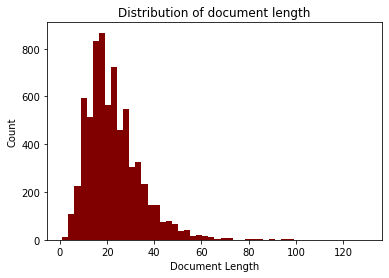

In [95]:
doc_lengths = [len(doc) for doc in training_data["text"]]

def plot_histogram(data, title, xlabel, ylabel, bins=50):
  """
  Plots a histogram of the data.

  Input:
    data: List[Int], representing the data to be plotted
    title: String, representing the title of the plot
    x_label: String, representing the x-axis label
    y_label: String, representing the y-axis label
    i: Int, representing the figure number
  Output:
    None
  """
  plt.hist(data, bins=bins, color="maroon")
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.show()

plot_histogram(
		doc_lengths,
		"Distribution of document length",
		"Document Length",
		"Count",
)

#### Q1.3: Provide a bar graph giving the token level distribution of NER tags, (O included): e.g. 10% of tokens are B-ORG, 20% of tokens are I-ORG, etc. What do you notice about this distribution? Is this what you might expect? What difficulties might this cause for your models?

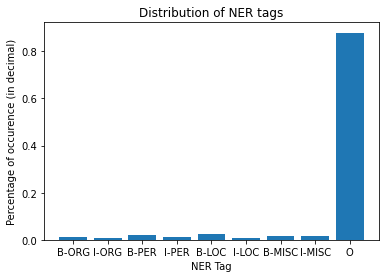

In [98]:
# YOUR CODE HERE
tags = ['B-ORG', 'I-ORG', 'B-PER', 'I-PER', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC', 'O']
total_tags = sum([len(ner_seq) for ner_seq in training_data['NER']])
tag_percentages = {tag: sum(ner_seq.count(tag) for ner_seq in training_data['NER'])/total_tags for tag in tags}
plt.bar(tag_percentages.keys(), tag_percentages.values())
plt.xlabel('NER Tag')
plt.ylabel('Percentage of occurence (in decimal)')
plt.title('Distribution of NER tags')
plt.show()

**Answer:** We notice that the distribution is skewed heavily towards text that is tagged with "O" (more than 80% of words are tagged with "O" and other tags have near 0 percent occurrence), which is something that we might expect, as named entities only constitute a small part of natural language. This might cause difficulty with our model in that assuming these percentages taken into consideration for transition probabilities, any sequence of tokens with not "O" tags could have close to 0 probability of happening, especially if rounding errors are taken into consideration.

#### Q1.4: Provide a list of the (tokens) of the 10 most common named entities. What do you notice about the list? Is this what you might expect? What difficulties might this cause for your models?

In [ ]:
# YOUR CODE HERE

#### Q1.5: Provide a scatter plot mapping the length of a document to the number of named entities in that document. Describe what the plot looks like, and what it might mean about the relationship between named entities and document length.

In [ ]:
# YOUR CODE HERE

#### Q1.6: Make a convincing arugment around a novel insight about the data. In only a few sentences, argue why this insight is important in understanding the data for this task, and support your answer with relevant graphs or statistics.

In [ ]:
# YOUR CODE HERE

## Part 2: Hidden Markov Model
In this part of the assignment, you will:
1. Implement code for counting and smoothing of labels and words, as well as unknown word handing, as necessary to support the Viterbi algorithm.
2. Build a Hidden Markov Model in accordance with the starter code that has been provided in `models.py`.
3. Implement the **Viterbi algorithm**, that can be used to infer token-level labels (identifying the appropriate named entity) for an input document. This process is commonly referred to as **decoding**. Bigram-based Viterbi is $ \mathcal{O}(sm^2)$ where *s* is the length of the sentence and *m* is the number of tags. Your implementation should have similar efficiency. The code for this can be used later on for the MEMM too.

### Unknown Word Handling
---
Handling unknown words is essential for improving the robustness of your sequence tagging model. When your model encounters words that were not present in the training data, it might struggle to make accurate predictions.

In this section, you will complete `handle_unknown_words(t, documents)` function in `helpers.py` The unknown word handling function replaces infrequently occurring words in the text data with a special "\<unk\>" token. This ensures that words with low occurrence are not treated as unique and distinct, allowing the model to recognize them as a common unknown category. By doing so, the method helps the model maintain consistent performance when dealing with unfamiliar or rare words, enhancing its ability to handle unseen data effectively.

After you complete the function, you may run the following basic test case. Passing this test does NOT guarantee correctness and it is a good idea to write some tests of your own.

In [ ]:
t = 0.5
documents = [["good", "morning"], ["is", "good", "morning"], ["hello"]]
expected_new_documents = [["good", "morning"], ["<unk>", "good", "morning"], ["<unk>"]]
expected_vocab = ["good", "morning", "<unk>"]
new_documents, vocab = handle_unknown_words(t, documents)

print(expected_new_documents)
print(new_documents)

assert expected_new_documents == new_documents
assert sorted(expected_vocab) == sorted(vocab)

### Smoothing
---
Smoothing makes our sequence tagging model more resilient to unexpected words and rare patterns, improving its ability to predict accurately on unseen data.

In this section, you will complete `apply_smoothing(k, observation_counts, unique_obs)` function in `helpers.py` file. The function implements an add-k smoothing. It adds a constant value (k) to each count before calculating probabilities, ensuring that no count is zero and that probabilities are never zero. While there are more advanced smoothing techniques, add-k smoothing provides a good starting point for handling the challenges of sparse data in probabilistic modeling.

For example, given an unsmoothed frequency count
```
unsmoothed_counts = {
    ('PER', 'John'): 3,
    ('PER', 'Google'): 0,
    ('PER', 'California'): 0,
    ('PER', 'works'): 0,
    ('PER', 'at'): 0,
    ('ORG', 'Google'): 2,
    ('ORG', 'John'): 0,
    ('ORG', 'California'): 0,
    ('ORG', 'works'): 0,
    ('ORG', 'at'): 0,
    ('LOC', 'Google'): 0,
    ('LOC', 'John'): 0,
    ('LOC', 'California'): 1,
    ('LOC', 'works'): 0,
    ('LOC', 'at'): 0,
    ('O', 'Google'): 0,
    ('O', 'John'): 0,
    ('O', 'California'): 0,
    ('O', 'works'): 4,
    ('O', 'at'): 5,
}
```
the smoothed frequency count should be
```
smoothed_counts = {
    ('PER', 'John'): 3 + 1,
    ('PER', 'Google'): 0 + 1,
    ('PER', 'California'): 0 + 1,
    ('PER', 'works'): 0 + 1,
    ('PER', 'at'): 0 + 1,
    ('ORG', 'Google'): 2 + 1,
    ('ORG', 'John'): 0 + 1,
    ('ORG', 'California'): 0 + 1,
    ('ORG', 'works'): 0 + 1,
    ('ORG', 'at'): 0 + 1,
    ...same for 'LOC' and 'O'
}
```
and the smoothed probability would be
```
smoothed_prob = {
    ('PER', 'John'): (3 + 1) / (3 + 1 + 0 + 1 + 0 + 1 + 0 + 1 + 0 + 1),
    ('PER', 'Google'): (0 + 1) / (3 + 1 + 0 + 1 + 0 + 1 + 0 + 1 + 0 + 1),
    ('PER', 'California'): (0 + 1) / (3 + 1 + 0 + 1 + 0 + 1 + 0 + 1 + 0 + 1),
    ('PER', 'works'): (0 + 1) / (3 + 1 + 0 + 1 + 0 + 1 + 0 + 1 + 0 + 1),
    ('PER', 'at'): (0 + 1) / (3 + 1 + 0 + 1 + 0 + 1 + 0 + 1 + 0 + 1),
    ('ORG', 'Google'): (2 + 1) / (2 + 1 + 0 + 1 + 0 + 1 + 0 + 1 + 0 + 1),
    ...
}
```
Note when you call `apply_smoothing` function later in the HMM and MEMM, the input `observation_counts` should contain counts for all possible `(curr NER tag, next NER tag)` pairs for transition matrix and `(NER tag, word)` pairs for emission matrix. i.e. if a `(NER tag, word)` doesn't appear in the training data, you should still include it as `observation_counts[(NER tag, word)]=0`.

After you complete the function, you may run the following basic test case. Passing this test does NOT guarantee correctness and it is a good idea to write some tests of your own.

In [ ]:
k = 1
test_counts = {
    ('PER', 'John'): 3,
    ('PER', 'Google'): 0,
    ('PER', 'California'): 0,
    ('PER', 'works'): 0,
    ('PER', 'at'): 0,
    ('ORG', 'Google'): 2,
    ('ORG', 'John'): 0,
    ('ORG', 'California'): 0,
    ('ORG', 'works'): 0,
    ('ORG', 'at'): 0,
    ('LOC', 'Google'): 0,
    ('LOC', 'John'): 0,
    ('LOC', 'California'): 1,
    ('LOC', 'works'): 0,
    ('LOC', 'at'): 0,
    ('O', 'Google'): 0,
    ('O', 'John'): 0,
    ('O', 'California'): 0,
    ('O', 'works'): 4,
    ('O', 'at'): 5,
}

expected_log_smoothed_probs = {
    ('PER', 'John'): np.log(4/8),
    ('PER', 'Google'): np.log(1/8),
    ('PER', 'California'): np.log(1/8),
    ('PER', 'works'): np.log(1/8),
    ('PER', 'at'): np.log(1/8),
    ('ORG', 'Google'): np.log(3/7),
    ('ORG', 'John'): np.log(1/7),
    ('ORG', 'California'): np.log(1/7),
    ('ORG', 'works'): np.log(1/7),
    ('ORG', 'at'): np.log(1/7),
    ('LOC', 'Google'): np.log(1/6),
    ('LOC', 'John'): np.log(1/6),
    ('LOC', 'California'): np.log(2/6),
    ('LOC', 'works'): np.log(1/6),
    ('LOC', 'at'): np.log(1/6),
    ('O', 'Google'): np.log(1/14),
    ('O', 'John'): np.log(1/14),
    ('O', 'California'): np.log(1/14),
    ('O', 'works'): np.log(5/14),
    ('O', 'at'): np.log(6/14),
}

vocab = ['John', 'Google', 'California', 'works', 'at']

log_smoothed_probs = apply_smoothing(k, test_counts, vocab)

assert len(expected_log_smoothed_probs) == len(log_smoothed_probs)
for key in test_counts:
    np.testing.assert_almost_equal(expected_log_smoothed_probs[key], log_smoothed_probs[key])

### **HMM Class Implementation**
---
In this section, you will be implementing the HMM class using the following properties.


- **documents**: dataset of sentences to train model
- **labels**: NER labels corresponding the sentences to train model
- **vocab**: dataset vocabulary
- **all_tags**: all possible NER tags
- **k_t**: add-k parameter to smooth transition probabilities
- **k_e**: add-k parameter to smooth emission probabilities
- **k_s**: add-k parameter to smooth starting state probabilities
- **smoothing_func**: smoothing function to smooth state-observation probabilities


In the `model.py` file, complete following methods under the HMM class:
1. `build_transition_matrix()`: returns the transition probabilities as a dictionary, mapping all possible (tag, tag) tuple pairs to their corresponding smoothed log probabilities

2. `build_emission_matrix()`:
    returns the emission probabilities as a dictionary, mapping all possible
    (tag, token) tuple pairs to their corresponding smoothed log probabilities
    
3. `get_start_state_probs()`:
    returns the starting state probabilities as a dictionary, mapping all possible
    tags to their corresponding smoothed log probabilities.
      
4. `get_trellis_arc(predicted_tag, previous_tag, document, i)`
     returns the trellis arc used by the Viterbi algorithm for the log probability of a given
    predicted_tag conditioned on the previous_tag and document at index i.


After you completed the class methods, call the HMM constructor to train your model with the following criteria:
- First handle unknown words by using your function `handle_unknown_words` from Part 2.1 using a threshold t = 0.01.
- Use the following smoothing parameters: k_t = 0.01, k_e = 0.01, k_s = 0.1
- Use your smoothing function that you have implemented in Part 2.2

In [ ]:
# YOUR CODE HERE

### **Viterbi Implementation**
---
Implement the function `viterbi(model, observation)` in `viterbi.py` that returns the model's predicted tag sequence for a particular observation. After you have completed the function, use the following cell to see an example tagged sequence.

In [ ]:
tags = ["B-ORG", "I-ORG", "B-PER", "I-PER", "B-LOC", "I-LOC", "B-MISC", "I-MISC", "O"]
obs = ['The',
 'White',
 'house',
 'located',
 'in',
 'Ithaca',
 'and',
 'was',
 'founded',
 'by',
 'Ezra',
 'Cornell']

# Uncomment and fill out the following line to test your implementation:
# viterbi(hmm, obs, tags)

### **Validation Step for HMM**
---
Understanding how models perform on unseen data is important, hence the validation set was set aside to be used in the evaluation of the model. In this part of the project, we expect you to train your HMM model (i.e., get transition and emission probabilities) on the labeled training data and evaluate it on the validation data. Report **Entity Level Mean F1**, which was explained earlier.

**TODO:** complete the function `evaluate_model(model, val_set, tags)` in the `validation.py` file that takes in a model (HMM / MEMM) and the validation dataset and returns the Entity Level Mean F1. <br>
In the `validation.py` file, you have the following helper methods:
- **flatten_double_lst(lstlst)**: Takes in a double nested list and returns the flattened version, row-major
- **format_output_labels(token_labels, token_indices)**: Takes in a list of token labels and the corresponding list of token indices and returns a dictionary with mapping NER labels (excluding 'O') to indices that have those labels
- **mean_f1(y_pred_dict, y_true_dict)**: Takes in two dictionaries (each mapping NER labels (excluding 'O') to indices that have those labels) that represent predicted labels and truth labels respectively and returns the mean f1 score.

Below is an example use case of **format_output_labels(token_labels, token_indices)**

In [ ]:
pred_token_labels = ["B-ORG", "O", "B-PER", "I-PER", "O", "B-LOC", "O", "O", "O", "O", "B-MISC", "O", "O", "O", "O", "B-LOC"]
true_token_labels = ["B-ORG", "O", "B-PER", "I-PER", "O", "B-LOC", "O", "O", "O", "O", "B-MISC", "I-MISC", "O", "O", "O", "B-LOC"]
token_indices = [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]

y_pred_dict = format_output_labels(pred_token_labels, token_indices)
print("y_pred_dict is : " + str(y_pred_dict))
y_true_dict = format_output_labels(true_token_labels, token_indices)
print("y_true_dict is : " + str(y_true_dict))

print("Entity Level Mean F1 score is : " + str(mean_f1(y_pred_dict, y_true_dict)))

After you complete `evaluate_model(model, val_set, tags)`, use the cell below to evaluate the model using the function you have just implemented. Please also take a look into your misclassified cases, as we will be performing error analysis in Part 4

In [ ]:
# YOUR CODE HERE

### HMM Analysis
#### Q2.1: In which situations did the system perform effectively, and when did it encounter challenges? For instance, does the model excel in predicting certain NER tags more than others? Could you offer any hypotheses about the reasons behind these patterns and suggest potential improvements?

In [ ]:
# YOUR CODE HERE

#### Q2.2: How does the treatment of unknown words and the application of smoothing impact the system's performance? Provide examples to illustrate your insights.

In [ ]:
# YOUR CODE HERE

---
### MILESTONE SUBMISSION
---

## **Part 3: Maximum Entropy Markov Model**

In this section, you will implement a Maximum Entropy Markov Model (**MEMM**) to perform the same NER task. Your model should consist of a MaxEnt classifier with Viterbi decoding.

1. We have already tokenized the documents. Use the MaxEnt classifier from [nltk](https://www.nltk.org/book/ch05.html) to make a discriminative classifier for the MEMM.

2. Use the classifier to learn a probability $P(t_i|features)$. This probability will be used to replace the product of the lexical generation probability – $P(w_i|t_i)$ – **and** the transition probability – $P(t_i|t_{i−1})$ – in the HMM.

3. To train such a classifier, you need to pick some feature set. The content of the feature set is up to you, but try different ones, and evaluate your choices using the mean f1 score on the validation set.
Here are some sample features that you may choose (**Note:** not all features are guaranteed to work well, but a combination of the given features is guaranteed to beat the baseline):
   - Part of Speech
   - A certain character (e.g: '.') in the token
   - Number of vowels
   - Capitalization
   - Length of current token, next token, previous token, etc.
   - Special characters (e.g: digits)
   - Stop words
   - Is the token the first token? Last token?
   - The token represents a location
   - Token frequency in the whole set of documents or current document
   - Current word is capitalized AND next word is as well
   - Identity of surrounding words
   - If you draw inspiration for your features from external sources, please link them in the code. Indicate any libraries used (ex.[nltk](https://www.nltk.org/book/ch05.html)) in Q3.1.

4. Use your own implementation of the **Viterbi algorithm** (same one used for the HMM model) to evaluate the MEMM on the same validation dataset in order to have a **fair comparison** with your **HMM model**.
5. Your MEMM model will be graded based on its performance on the test set. In order to earn full credit, the model's score must be at least the **baseline = 0.40**. If the model's score is below 0.40, your grade will be a linear function of the score (this ensures that if you are close to the baseline, you will be getting the majority of the credit).

Please also take a look into your misclassified cases, as we will be performing error analysis in Part 4.

Here's a summary of the workflow for Part 3:
![alt text](https://drive.google.com/uc?export=view&id=14VfjW3yDyXLojWM_u0LeJYdDOSLkElBn)

### Feature Engineering
---
[Optional] Use this space to explore potential features to use in your classifier.

In [ ]:
# YOUR CODE HERE

### MEMM Class Implementation
---
In this section, you will be implementing the MEMM class using the following properties.


- **documents**: dataset of sentences to train model
- **labels**: NER labels corresponding the sentences to train models

In the `model.py` file, implement the following methods under the MEMM class in `models.py`:
1. `extract_features_token(document, i)`:
    returns extracted features for token at index i in document
2. `generate_classifier()`:
    featurizes the entire dataset and trains the MaxEnt model
3. `get_trellis_arc(predicted_tag, previous_tag, document, i)`:
    returns the trellis arc used by the Viterbi algorithm for the label predicted_tag conditioned on the features of the token at index i in document

- **NOTE:** If the specs of generate_classifier() method seem vague, that is on purpose. We want you to be able to determine for yourself the correct parameters needed to train the classifier using the nltk classifier package. We highly recommend looking through the NLTK MaxEntClassifier documentation before implementing the 2nd method! To train your classifier, we suggest trying around 8-10 training iterations.

After you completed the class methods, call the MEMM constructor to train your model in the cell below.

**NOTE:** Don't be afraid if your model takes at least 10+ minutes to train, that's perfectly normal! If you find yourself having training times in the 30+ minute range, consider whether some of your features are actually needed in the model.

In [ ]:
# YOUR CODE HERE

### Validation Step for MEMM
---
In this section we want you to run your MaxEnt model on the validation dataset. We want you to play around with different combinations of features in order to find which features work the best for your implementation. You will be asked to write about this process in detail in written Q3.3 so please spend time experimenting with features! Please use the `evaluate_model(model, val_set, tags)` function that you have implemented in Part 2 for computing Entity Level Avg F1 to evaluate your model in the cell below.

In [ ]:
# YOUR CODE HERE

### **MEMM Analysis**
---
#### Q3.1: Explain here how you evaluated the MEMM model. Summarize the performance of your system and any variations that you experimented with the validation datasets. Put the results into clearly labeled tables or diagrams and include your observations and analysis.

#### Q3.2: What features are considered most important by your MaxEnt Classifier? Why do you think these features make sense? Describe your experiments with feature sets. An analysis on feature selection for the MEMM is required – e.g. what features **help most**, why? An **error analysis** is required – e.g. what sorts of errors occurred, why?

#### Q3.3: When did the system work well, when did it fail and any ideas as to why? How might you improve the system?


## **Part 4: Comparing HMMs and MEMMs**
In this section you will be asked to analyze and compare the models you have developed!
### Analysis Questions
#### **Q4.1: Result Comparison**:  Compare here your results (validation scores) for your HMM and the MEMM. Which of them performs better? Why?

#### **Q4.2: Error Analysis 1**: Do some error analysis. What are error patterns you observed that the HMM makes but the MEMM does not? Try to justify why/why not? **Please give examples from the dataset.**

#### **Q4.3: Error Analysis 2**:  What are error patterns you observed that MEMM makes but the HMM does not? Try to justify what you observe? **Please give examples from the dataset.**

## **Part 5: Submission**
Since your MEMM model is graded based on its performance on the test set, there will be a pseudo-assignment on Gradescope where you can submit your model's predictions on test data and see the test score. Each student is allowed to submit to this assignment a maximum of 10 times per day, which resets every midnight. In this section, you will generate a file `output.txt` that will contain the predictions of your MEMM model that you can submit to Gradescope to test your model's performance on test data. Below, we provide a function `create_submission(predictions)` that takes in the predicted labels of the test dataset and output it in the correct format in `output.txt`. As a scoring metric on Gradescope, we use **Entity Level Mean F1**.

To use `create_submission(predictions)`, you want to first train your MEMM model on the training dataset (If you have already done this in previous steps, great!). Then, for each sentence in the testing dataset, run your `viterbi` function using your trained MEMM model and append the result to a list. Pass in the list to `create_submission`.

In [ ]:
import json

### TODO: Run viterbi algorithm using your MEMM model on the test dataset and generate predictions (List[List[str]])

def create_submission(predictions):
    """
    Parameter:
    predictions (List[List[str]]):
        Prediction results for the test dataset.
        It contains a list of a string list.
        Each string list corresponds to a test sentence in the test file.
    """
    with open('output.txt', 'w') as file:
        file.write(json.dumps(predictions))

# Uncomment to use
# create_submission(predictions)